# LEVEL 1 TASK

### IRIS FLOWER CLASSIFICATION

• The Iris flower dataset encompasses three distinct species: setosa, versicolor,
and virginica.

• These species are discernible through specific measurements. Imagine
possessing measurements of Iris flowers categorized by their distinct species.

• The goal is to train a machine learning model capable of learning from these
measurements and proficiently categorizing Iris flowers into their corresponding
species.

• Employ the Iris dataset to construct a model adept at classifying Iris flowers into
distinct species based on their sepal and petal measurements.

• This dataset serves as a prevalent choice for initial classification tasks, making it
ideal for introductory learning experiences

##### Importing the Required Libraries

In [1]:
# Pandas Library for Dataframe
import pandas as pd

# Numpy Library for Numerical Calculations
import numpy as np

# Matplotlib and Seaborn for Plottings
import matplotlib.pyplot as plt
import seaborn as sns

# Pickle Library for Saving the Model
import pickle

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# KFold and Cross_Val_Score for Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Logistic Regression, Decision Tree, K Neighbors, Naive Bayes, SVC and Linear Discriminant are Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Accuracy Score, Classification Report and Confusion Matrix is for Analysis of Models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### load DataSet

In [4]:
iris = pd.read_csv("IRISFLOWER.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Checking for null values in Data

In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Checking the First Five Values in the Data

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Checking the Last Five Values in the Data

In [7]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


#### Column in the Dataset

In [8]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#### Dimensions of the Dataset

In [9]:
iris.shape

(150, 5)

#### Describing the Dataset

In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Dataset information

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### check duplicate values

In [14]:
iris.duplicated().sum()

3

#### check duplicate values

In [16]:
iris.drop_duplicates(inplace=True)

##### Checking for the classes in the Data

In [19]:
iris.groupby('species').size()

species
Iris-setosa        48
Iris-versicolor    50
Iris-virginica     49
dtype: int64

### Visualization of the Data

##### Classes distribution over Count of each class Plotting

Text(0, 0.5, 'Count')

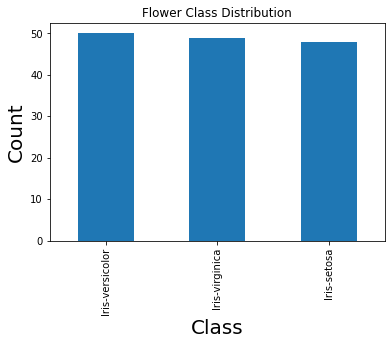

In [20]:
species_plot = iris['species'].value_counts().plot.bar(title = 'Flower Class Distribution')
species_plot.set_xlabel('Class',size=20)
species_plot.set_ylabel('Count',size=20)

#### Box and Whisker Plot

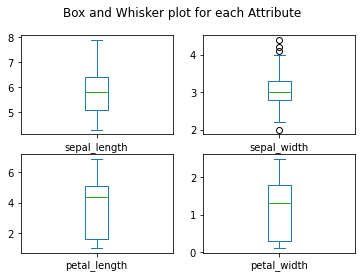

In [21]:
iris.plot(kind = 'box', subplots = True, layout = (2, 2), 
               sharex = False, sharey = False, title = "Box and Whisker plot for each Attribute")
plt.show()

To check the Attribute Distribution

##### Histogram Plotting

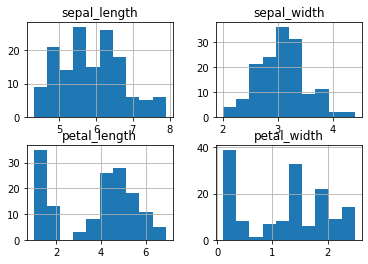

In [22]:
iris.hist()
plt.show()
     

To check Value Distribution in the Dataset

##### Multivariate Scatter Plot

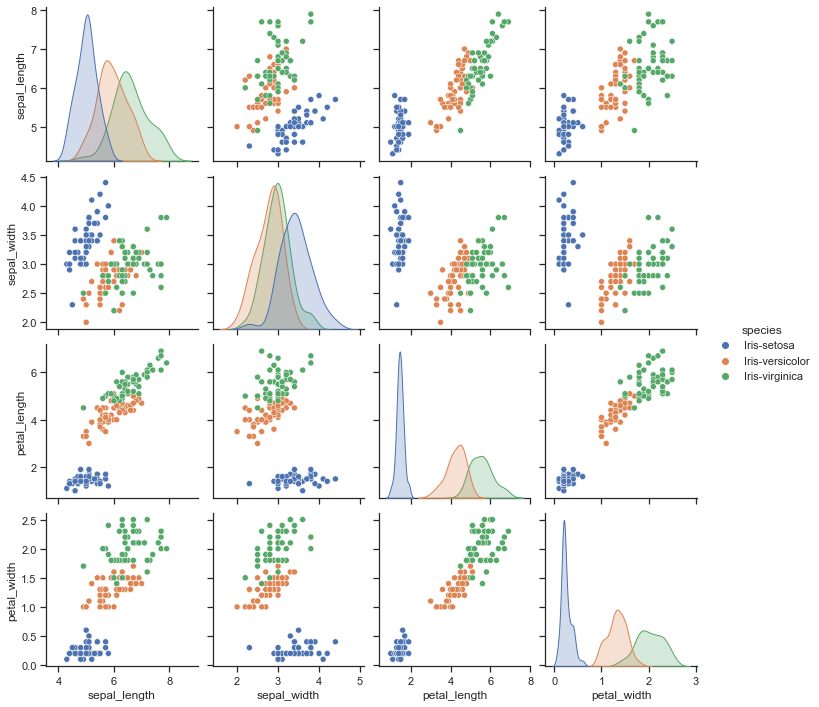

In [24]:
sns.set(style = "ticks")
sns.pairplot(iris, hue = "species")

Pair-wise Relationship in Dataset

In [25]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


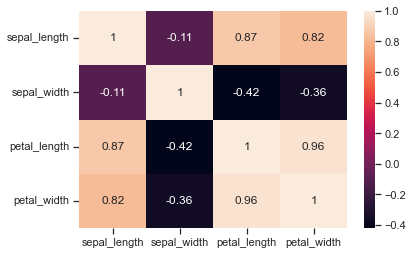

In [26]:
sns.heatmap(iris.corr(),annot = True)
plt.show()

## Data Modeling

##### Splitting the Dataset into Training and Testing

In [27]:
X = iris.drop(['species'], axis=1)
Y = iris['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=25)

##### Checking the Dimensions of Training and Testing Data

In [28]:
print("X_Train Shape:", X_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Train Shape:", X_train.shape)
print("Y_Test Shape:", Y_test.shape)
     

X_Train Shape: (110, 4)
X_Test Shape: (37, 4)
Y_Train Shape: (110, 4)
Y_Test Shape: (37,)


In [30]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object

## Model Building

#### Creating the Models

In [32]:
# All the Models will be stored in this models list.
models = []

# Linear Models
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))

# Non-linear Models
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma = "auto")))

print("Model Accuracy")

# Evaluating each Models
names = []
accuracy = []
for name, model in models:
    
    # 15 Cross Fold Validation for each Models
    kfold = KFold(n_splits=15)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
    # Displaying the Accuracy of each Model in Validation
    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: Accuracy = %f" % (name, cv_results.mean())
    print(msg)

Model Accuracy
LR: Accuracy = 0.963095
LDA: Accuracy = 0.990476
CART: Accuracy = 0.971429
KNN: Accuracy = 0.982143
GNB: Accuracy = 0.971429
SVC: Accuracy = 0.980952


### Testing Model

##### Testing Models

In [33]:
models = []

# Linear Models
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))

# Non-linear Models
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma = "auto")))

##### Creating Function for Testing the Models

In [34]:
def test_model(model):
    # Training the Dataset with Training Set
    model.fit(X_train, Y_train)
    
    # Predicting the Values with Testing Set
    predictions = model.predict(X_test)
    
    # Model Testing Results
    print("Accuracy:", accuracy_score(Y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, predictions))
    print("Classification Report:")
    print(classification_report(Y_test, predictions))

#### Testing the Models

In [35]:
# Predicting the Values
for name, model in models:
    print("----------------")
    print("Testing:", name)
    test_model(model)

----------------
Testing: LR
Accuracy: 0.918918918918919
Confusion Matrix:
[[15  0  0]
 [ 0  8  3]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.73      0.84        11
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.92        37
      macro avg       0.93      0.91      0.91        37
   weighted avg       0.94      0.92      0.92        37

----------------
Testing: LDA
Accuracy: 0.9459459459459459
Confusion Matrix:
[[15  0  0]
 [ 0  9  2]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.95        37
      macro avg       0.95      0.94   

In Testing Top 3 Models are,

1-SVC

2-CART

3-LDA

#### Saving Models

##### Saving the Best Performed Models

In [36]:
for name, model in models:
    filename = name + ".pkl"
    pickle.dump(model, open(filename, 'wb'))
print("Saved all Models")

Saved all Models
